BIKE SHARING DATASET

Data Cleaning

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import DaskLGBMRegressor
from sklearn.compose import ColumnTransformer


In [7]:
#pip install dask[dataframe]

In [8]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
print(df_train.isna().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [10]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [12]:
df_train.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [13]:
df_train.shape

(10886, 12)

In [14]:
df_test.shape

(6493, 9)

In [15]:
df_train['datetime']=pd.to_datetime(df_train['datetime'])
print(df_train['datetime'].dtypes)
df_test['datetime']=pd.to_datetime(df_test['datetime'])
print(df_test['datetime'].dtypes)

datetime64[ns]
datetime64[ns]


changing datatypes to category for seasonal and weather
changind datatypes to boolean for holiday and workday

In [16]:
convert_dict = {'season': 'category',
                'holiday': bool,
                'workingday': bool,
                'weather': 'category'
                }
print("===================TRAIN===============")
df_train1=df_train.astype(convert_dict)
print(df_train1.dtypes)
print("\n===================TEST=================")
df_test1=df_test.astype(convert_dict)
print(df_test1.dtypes)

===================TRAIN===============
datetime      datetime64[ns]
season              category
holiday                 bool
workingday              bool
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

===================TEST=================
datetime      datetime64[ns]
season              category
holiday                 bool
workingday              bool
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object


using hf  helper function for ploating

In [17]:
df_train1.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886,10886,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,False,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575,7412,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [18]:
df_test1.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.0,6493,6493,6493.0,6493.000000,6493.000000,6493.000000,6493.000000
unique,NaN,4.0,2,2,4.0,NaN,NaN,NaN,NaN
top,NaN,3.0,False,True,1.0,NaN,NaN,NaN,NaN
freq,NaN,1763.0,6304,4453,4221.0,NaN,NaN,NaN,NaN
mean,2012-01-13 09:27:47.765285632,NaN,NaN,NaN,NaN,20.620607,24.012865,64.125212,12.631157
min,2011-01-20 00:00:00,NaN,NaN,NaN,NaN,0.820000,0.000000,16.000000,0.000000
25%,2011-07-22 15:00:00,NaN,NaN,NaN,NaN,13.940000,16.665000,49.000000,7.001500
50%,2012-01-20 23:00:00,NaN,NaN,NaN,NaN,21.320000,25.000000,65.000000,11.001400
75%,2012-07-20 17:00:00,NaN,NaN,NaN,NaN,27.060000,31.060000,81.000000,16.997900
max,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,40.180000,50.000000,100.000000,55.998600


In [19]:
for dataset in [df_train1,df_test1]:
    # Datetime Handling
    dataset['time'] = dataset['datetime'].dt.time
    dataset['date'] = dataset['datetime'].dt.date
    dataset['hour'] = dataset['datetime'].dt.hour
    dataset['month'] = dataset['datetime'].dt.month
    dataset['day'] = dataset['datetime'].dt.weekday
    dataset['year'] = dataset['datetime'].dt.year

In [20]:
print(df_train1.columns)
print(df_test1.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'time', 'date', 'hour', 'month', 'day', 'year'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'time', 'date', 'hour', 'month',
       'day', 'year'],
      dtype='object')


In [21]:
df_train1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,date,hour,month,day,year
0,2011-01-01 00:00:00,1,False,False,1,9.84,14.395,81,0.0,3,13,16,00:00:00,2011-01-01,0,1,5,2011
1,2011-01-01 01:00:00,1,False,False,1,9.02,13.635,80,0.0,8,32,40,01:00:00,2011-01-01,1,1,5,2011
2,2011-01-01 02:00:00,1,False,False,1,9.02,13.635,80,0.0,5,27,32,02:00:00,2011-01-01,2,1,5,2011
3,2011-01-01 03:00:00,1,False,False,1,9.84,14.395,75,0.0,3,10,13,03:00:00,2011-01-01,3,1,5,2011
4,2011-01-01 04:00:00,1,False,False,1,9.84,14.395,75,0.0,0,1,1,04:00:00,2011-01-01,4,1,5,2011


In [22]:
#df_train1.pop('datetime')
#df_test1.pop('datetime')

In [23]:
df_train1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,date,hour,month,day,year
0,2011-01-01 00:00:00,1,False,False,1,9.84,14.395,81,0.0,3,13,16,00:00:00,2011-01-01,0,1,5,2011
1,2011-01-01 01:00:00,1,False,False,1,9.02,13.635,80,0.0,8,32,40,01:00:00,2011-01-01,1,1,5,2011
2,2011-01-01 02:00:00,1,False,False,1,9.02,13.635,80,0.0,5,27,32,02:00:00,2011-01-01,2,1,5,2011
3,2011-01-01 03:00:00,1,False,False,1,9.84,14.395,75,0.0,3,10,13,03:00:00,2011-01-01,3,1,5,2011
4,2011-01-01 04:00:00,1,False,False,1,9.84,14.395,75,0.0,0,1,1,04:00:00,2011-01-01,4,1,5,2011


In [24]:
df_test1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time,date,hour,month,day,year
0,2011-01-20 00:00:00,1,False,True,1,10.66,11.365,56,26.0027,00:00:00,2011-01-20,0,1,3,2011
1,2011-01-20 01:00:00,1,False,True,1,10.66,13.635,56,0.0000,01:00:00,2011-01-20,1,1,3,2011
2,2011-01-20 02:00:00,1,False,True,1,10.66,13.635,56,0.0000,02:00:00,2011-01-20,2,1,3,2011
3,2011-01-20 03:00:00,1,False,True,1,10.66,12.880,56,11.0014,03:00:00,2011-01-20,3,1,3,2011
4,2011-01-20 04:00:00,1,False,True,1,10.66,12.880,56,11.0014,04:00:00,2011-01-20,4,1,3,2011


In [25]:
#pip install mplcursors
import matplotlib.pyplot as plt
import mplcursors
import plotly.graph_objects as go

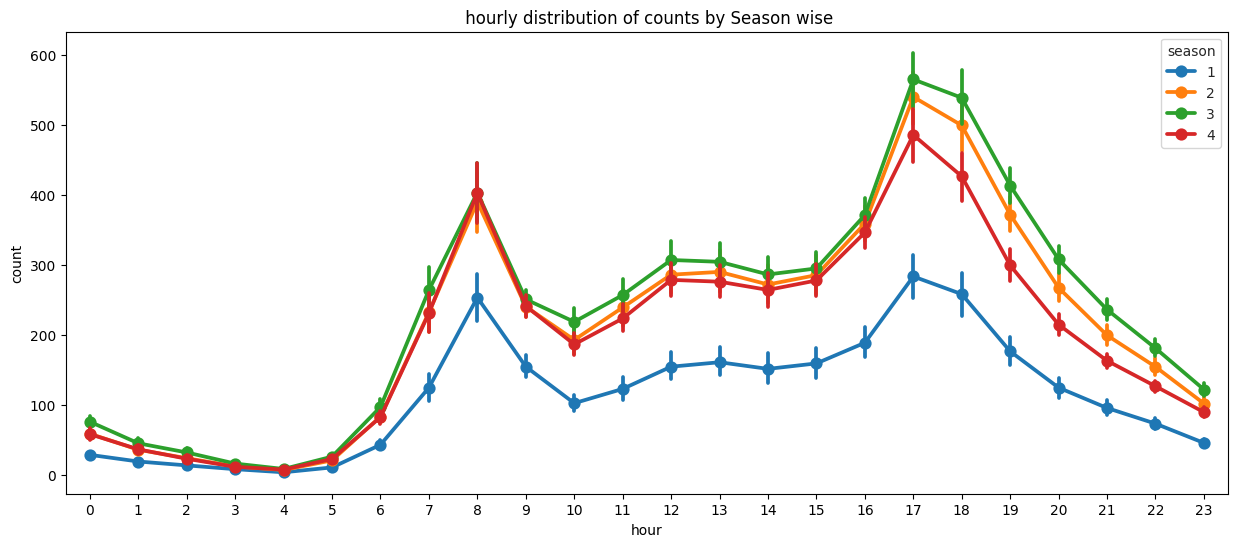

In [26]:

fig,ax=plt.subplots(figsize=(15,6))
sns.set_style('white')
sns.pointplot(x='hour',y='count',data=df_train1[['hour','count','season']],hue='season',ax=ax)
ax.set_title(' hourly distribution of counts by Season wise')
plt.show()

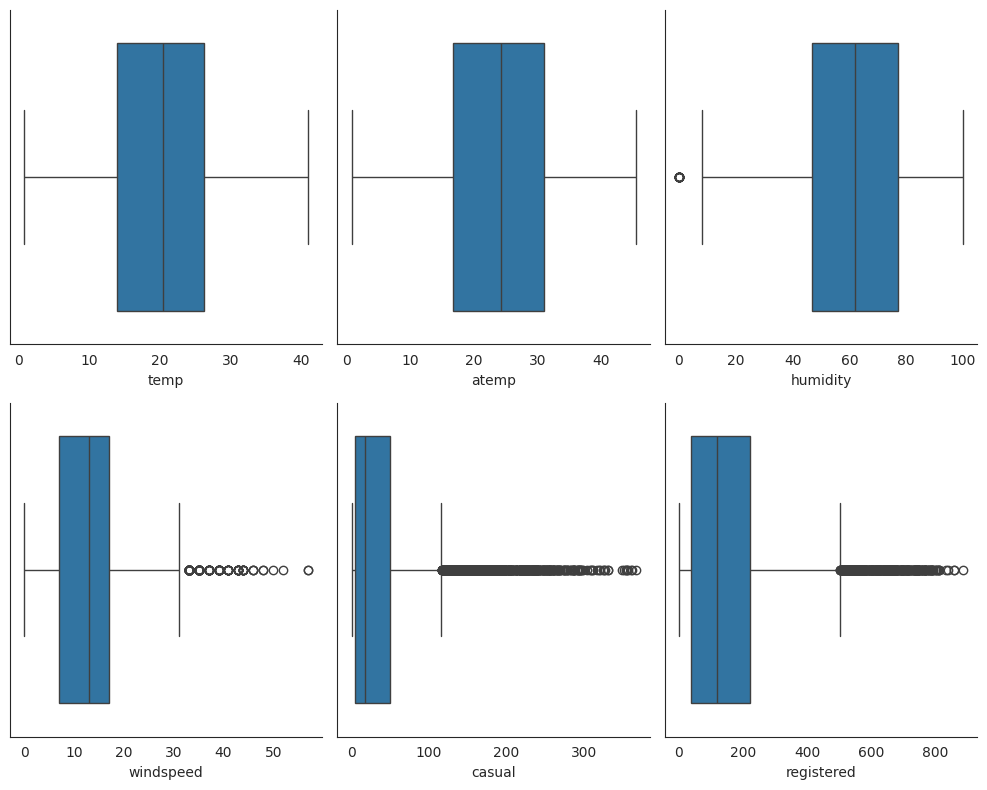

In [27]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 8))

for i, column in enumerate(["temp", "atemp", "humidity", "windspeed", "casual", "registered"]):

    row, col = divmod(i, 3)
    sns.boxplot(data = df_train1, x = column, ax = ax[row, col])
    sns.despine()

plt.tight_layout()
plt.show()

In [28]:
fig = go.Figure(data=[go.Bar(x=df_train1['day'],y=df_train1['count'] ,text=df_train1['count'] , textposition='auto')])
fig.update_layout(
title='Scatter Plot with Hover Functionality',
xaxis_title='Days',
yaxis_title='Total_Count',
hovermode='closest'
)
fig.show()

In [29]:
# fig = go.Figure(data=go.Scatter(x=df_train1['hour'],y=df_train1['count'], mode='markers', text='count', textposition='top center'))

fig = go.Figure(data=[go.Pie(labels=df_train1['year'], values=df_train1['count'], hoverinfo='label+percent', textinfo='value', textfont_size=20)])


fig.update_layout(title='Yearly count')
fig.show()

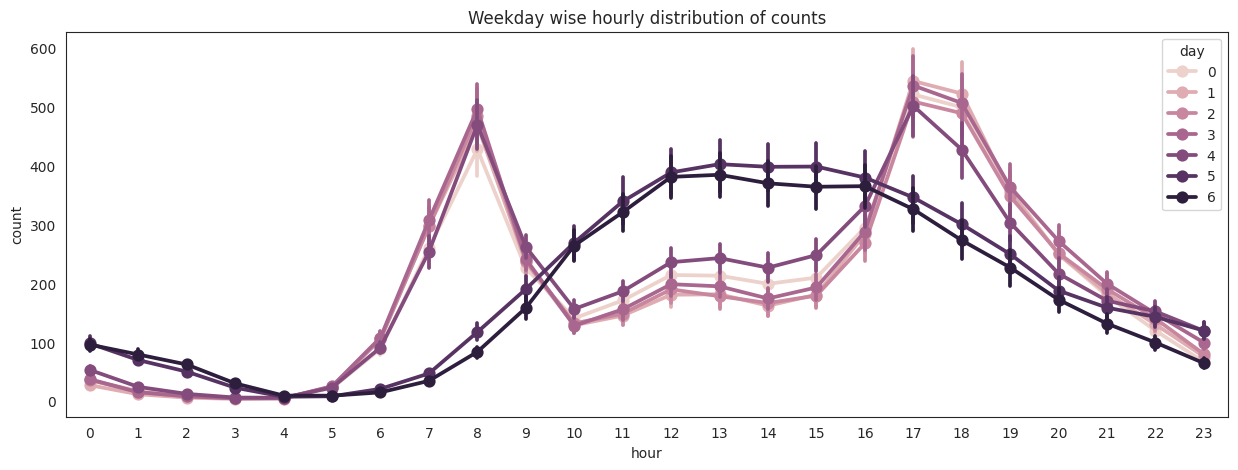

In [30]:
fig,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='hour',y='count',data=df_train1[['hour','count','day']],hue='day')
ax.set_title('Weekday wise hourly distribution of counts')
plt.show()

In [38]:
# from plotly.subplots import make_subplots

# fig = make_subplots(rows=2, cols=2, subplot_titles=('Bar Chart 1', 'Line Plot 1', 'Scatter Plot 1', 'Line Plot 2'))

# # Add bar chart
# fig.add_trace(go.Bar(x=df_train1['day'], y=df_train1['count'], name='Bar Chart 1'), row=1, col=1)

# # Add line plot
# fig.add_trace(go.Scatter(x=df_train1['hour'], y=df_train1['count'], mode='lines+markers', name='Line Plot 1'), row=1, col=2)

# # Add scatter plot
# fig.add_trace(go.Scatter(x=df_train1['humidity'], y=df_train1['count'], mode='markers', name='Scatter Plot 1'), row=2, col=1)

# # Add another line plot
# fig.add_trace(go.Scatter(x=df_train1['windspeed'], y=df_train1['count'], mode='lines+markers', line=dict(dash='dash'), name='Line Plot 2'), row=2, col=2)

# # Update layout
# fig.update_layout(
#     title_text='2x2 Grid of Charts with Hover Functionality',
#     showlegend=False,
#     height=700
# )

# # Show plot
# fig.show()

,windspeed,count
windspeed,1.000000,0.101369
count,0.101369,1.000000


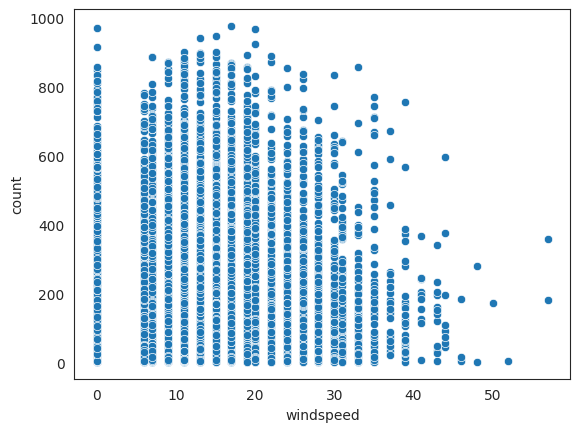

In [40]:
sns.scatterplot(x=df_train1["windspeed"],y=df_train1["count"])
df_train1[["windspeed","count"]].corr()

,humidity,count
humidity,1.000000,-0.317371
count,-0.317371,1.000000


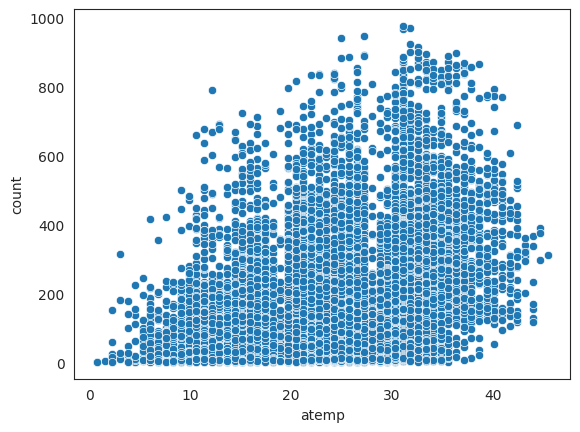

In [56]:
sns.scatterplot(x=df_train1["atemp"],y=df_train1["count"])
df_train1[["humidity","count"]].corr()


,day,count
day,1.000000,-0.002283
count,-0.002283,1.000000


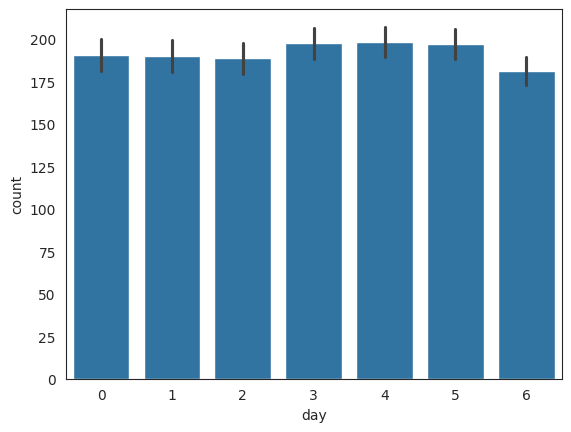

In [49]:
sns.barplot(x=df_train1["day"] , y= df_train1["count"])
df_train1[["day", "count"]].corr()

<Axes: >

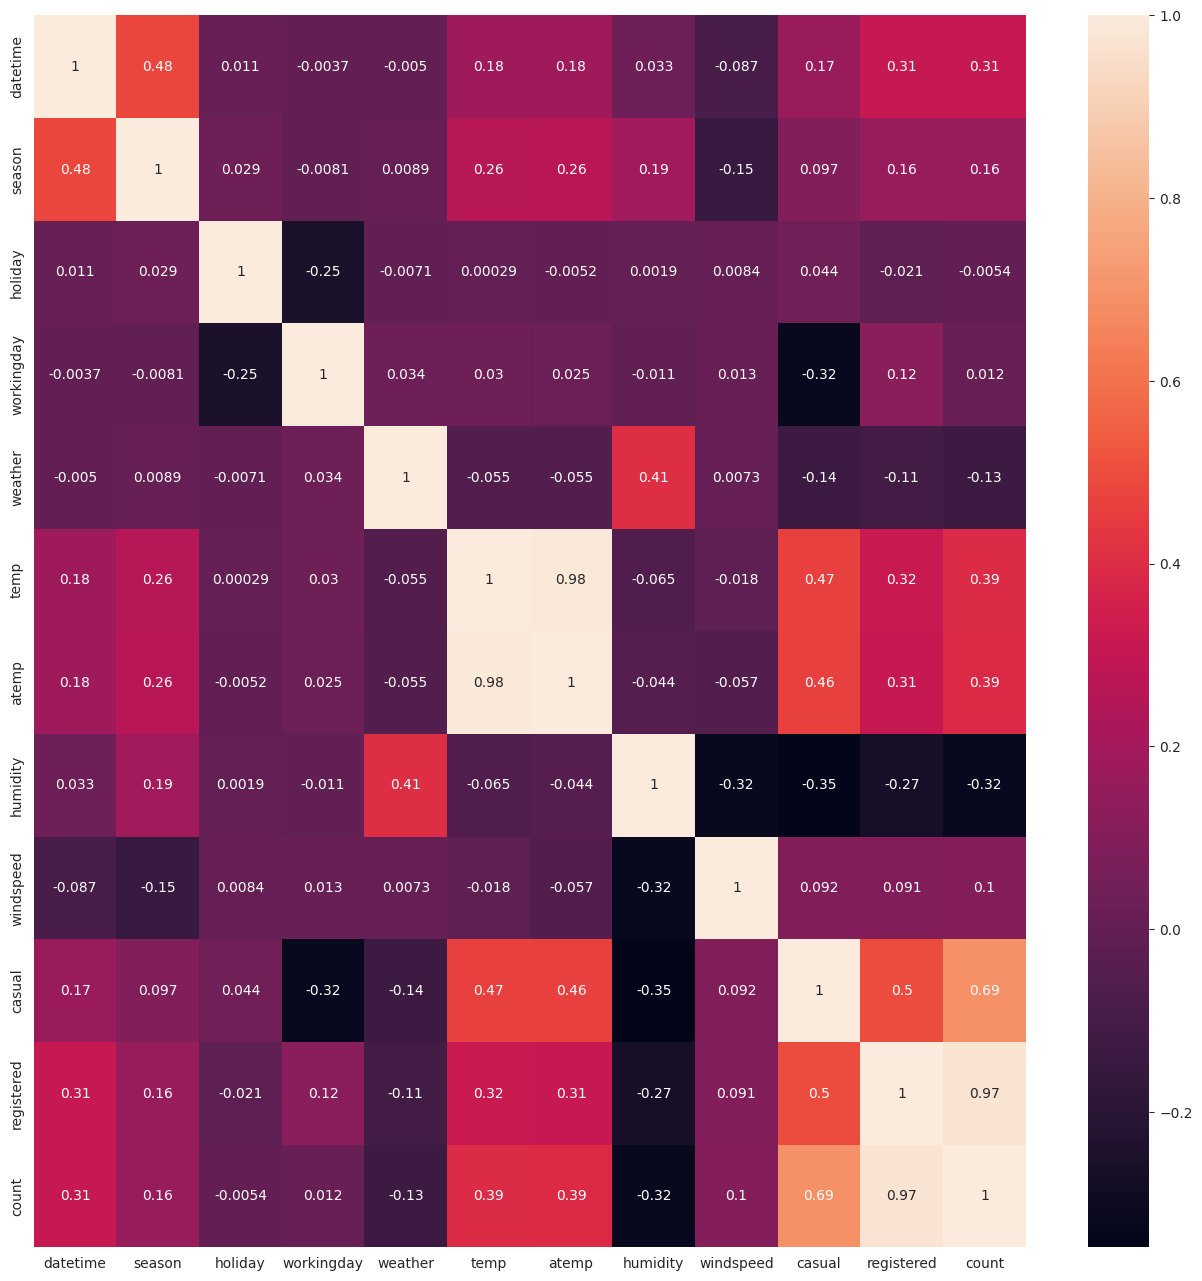

In [37]:
plt.figure(figsize = (16, 16))
sns.heatmap(df_train.corr(), annot = True)

In [50]:
sum(df_train1.duplicated())

0

<ipython-input-54-8be0f73597cf>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='humidity', ylabel='Density'>

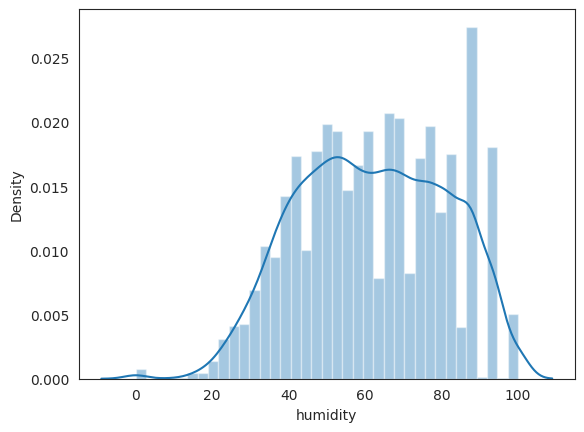

In [54]:
sns.distplot(df_train1['humidity'])

In [89]:
convert_dict = {'season': 'int64',
                'holiday': 'int64',
                'workingday':'int64',
                'weather': 'int64'
                }
print("===================TRAIN===============")
df_train2=df_train1.astype(convert_dict)
print(df_train2.dtypes)
df_train2

===================TRAIN===============
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
time           object
date           object
hour            int32
month           int32
day             int32
year            int32
dtype: object


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,date,hour,month,day,year
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00:00:00,2011-01-01,0,1,5,2011
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01:00:00,2011-01-01,1,1,5,2011
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02:00:00,2011-01-01,2,1,5,2011
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03:00:00,2011-01-01,3,1,5,2011
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04:00:00,2011-01-01,4,1,5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19:00:00,2012-12-19,19,12,2,2012
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20:00:00,2012-12-19,20,12,2,2012
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21:00:00,2012-12-19,21,12,2,2012
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22:00:00,2012-12-19,22,12,2,2012


LINEAR Regression

In [96]:
df_duplicate=df_train1
#df_train2=df_train1.drop("datetime", axis= "columns")
#df_train2=df_train1.pop("time")
#df_train2=df_train1.pop("date")
X= df_train2.drop("count", axis= "columns")

Y= df_train2["count"]
df_train2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,year
0,1,False,False,1,9.84,14.395,81,0.0,3,13,16,0,1,5,2011
1,1,False,False,1,9.02,13.635,80,0.0,8,32,40,1,1,5,2011
2,1,False,False,1,9.02,13.635,80,0.0,5,27,32,2,1,5,2011
3,1,False,False,1,9.84,14.395,75,0.0,3,10,13,3,1,5,2011
4,1,False,False,1,9.84,14.395,75,0.0,0,1,1,4,1,5,2011


In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.35, random_state=10)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [113]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7075, 14), (3811, 14), (7075,), (3811,))

In [114]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)


1.0

In [115]:
coef_df= pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"]) #  bathroom, utility avial, mzzone, int_sqft, sale cond
Y_predict= lr.predict(X_test)
coef_df

,Coefficient
season,-4.018897e-15
holiday,1.776357e-14
workingday,-2.325917e-14
weather,2.417511e-14
temp,-1.589839e-13
atemp,1.190159e-13
humidity,7.727152e-14
windspeed,5.240253e-14
casual,4.967769e+01
registered,1.500032e+02


In [116]:
from sklearn.metrics import r2_score
accuracy= r2_score(Y_test,lr.predict(X_test))
accuracy

1.0

KNN REGRESSION

In [117]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsRegressor(i)                #best value of k =4, 0.9480329733888395
  knn.fit(X_train, Y_train)
  # print("k value  :" , i, "score  :", knn.score(X_test, Y_test))
  print("K value  :", i, "val Accuracy :" , np.mean(cross_val_score(knn, X_train, Y_train, cv=10)))

K value  : 1 val Accuracy : 0.9163089575448786
K value  : 2 val Accuracy : 0.940918822143378
K value  : 3 val Accuracy : 0.9472129300605477
K value  : 4 val Accuracy : 0.9493334678373346
K value  : 5 val Accuracy : 0.9502302102610679
K value  : 6 val Accuracy : 0.9510678535016744
K value  : 7 val Accuracy : 0.9511127809187343
K value  : 8 val Accuracy : 0.9506583097900068
K value  : 9 val Accuracy : 0.9508387116579508
K value  : 10 val Accuracy : 0.9502173437014496
K value  : 20 val Accuracy : 0.9429287316765855
K value  : 30 val Accuracy : 0.936438769896642
K value  : 40 val Accuracy : 0.9301410230201819
K value  : 50 val Accuracy : 0.9242769174188687


DECISION TREE REGRESSOR

In [118]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt= DecisionTreeRegressor(max_depth= depth)
  dt.fit(X_train, Y_train)
  accuracy= r2_score(Y_test,dt.predict(X_test))
  dt= DecisionTreeRegressor(max_depth= depth)
  val= cross_val_score(dt, X, Y, cv=10)
  print(depth, accuracy, np.mean(val))

1 0.6577648255195737 0.4634795864947286
2 0.8650881590826258 0.7921425892668678
3 0.9431736482112685 0.8960044975038425
4 0.9698839049190169 0.9522106747978365
5 0.9845837139551249 0.9751670008037863
6 0.9918511125838241 0.9876102028952343
7 0.9957066158497211 0.9933384930137963
8 0.9974000923321977 0.9962258697038407
9 0.9981747713830792 0.9976741471900004
10 0.9985796949872454 0.9982099463781969
20 0.9986459126098141 0.998630083613308
40 0.9986715336375023 0.9985301601438781
60 0.9986095789026578 0.99855527805038


In [119]:
dt= DecisionTreeRegressor(max_depth= 20)
dt.fit(X_train, Y_train)
pred= dt.predict(X_test)
val= cross_val_score(dt, X, Y, cv=10)
accuracy= np.mean(val)
print(accuracy)

0.9985885926157095


COMPARING ACTUAL AND PREDICTED

In [120]:
df2= pd.DataFrame({"Actual": Y_test, "Predicted": pred})
df2

,Actual,Predicted
8686,67,69.0
8453,369,367.0
10419,251,257.0
3192,191,188.0
176,74,75.0
...,...,...
4038,332,335.0
8365,224,232.0
10268,50,50.0
6061,161,159.0


In [121]:
X_test.shape, Y_test.shape

((3811, 14), (3811,))

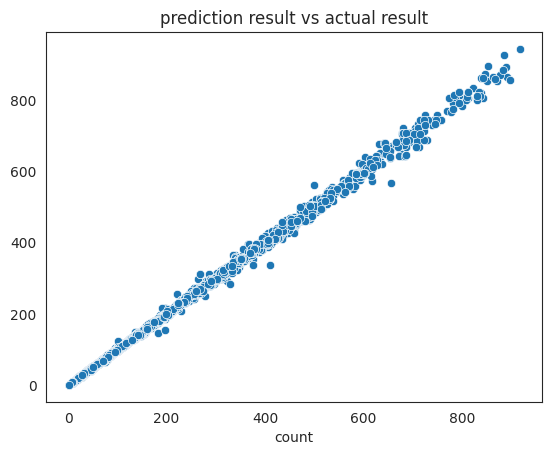

In [122]:
sns.scatterplot(x= Y_test, y=pred)
plt.title("prediction result vs actual result")
plt.show()